<a href="https://colab.research.google.com/github/Hari25483/Backend-with-ML-Models/blob/main/CNN%20architecture%20with%20different%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import tensorflow as tf


In [20]:
# Set up image data generator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Set up the training and test data generators
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=42)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=True,
                                            seed=42)


Found 1278 images belonging to 4 classes.
Found 220 images belonging to 4 classes.


In [23]:

# Set up the model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax'))

In [24]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model to the training data
history = model.fit_generator(training_set,
                    steps_per_epoch = training_set.samples // training_set.batch_size,
                    epochs = 25,
                    validation_data = test_set,
                    validation_steps = test_set.samples // test_set.batch_size,
                    verbose=1)

Epoch 1/25


<ipython-input-24-832376a054f4>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


39/39 [==============================] - 8s 189ms/step - loss: 1.2498 - accuracy: 0.4430 - val_loss: 1.2182 - val_accuracy: 0.4844
Epoch 2/25
39/39 [==============================] - 7s 168ms/step - loss: 1.0457 - accuracy: 0.5714 - val_loss: 1.1653 - val_accuracy: 0.5625
Epoch 3/25
39/39 [==============================] - 7s 170ms/step - loss: 0.9855 - accuracy: 0.5987 - val_loss: 1.1103 - val_accuracy: 0.5729
Epoch 4/25
39/39 [==============================] - 7s 173ms/step - loss: 0.8538 - accuracy: 0.6557 - val_loss: 1.0969 - val_accuracy: 0.5781
Epoch 5/25
39/39 [==============================] - 7s 170ms/step - loss: 0.8140 - accuracy: 0.6942 - val_loss: 0.9738 - val_accuracy: 0.7240
Epoch 6/25
39/39 [==============================] - 7s 187ms/step - loss: 0.7333 - accuracy: 0.7343 - val_loss: 0.8792 - val_accuracy: 0.6927
Epoch 7/25
39/39 [==============================] - 8s 217ms/step - loss: 0.6917 - accuracy: 0.7247 - val_loss: 0.8966 - val_accuracy: 0.6771
Epoch 8/25
39/39 

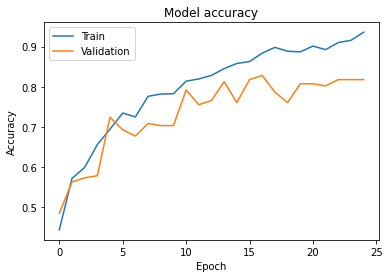

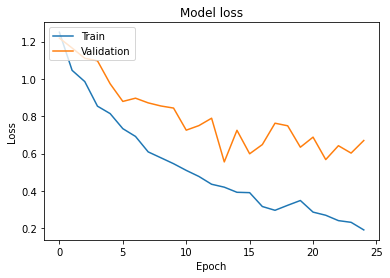

In [27]:
import matplotlib.pyplot as plt

# Plot the training accuracy
plt.plot(history.history['accuracy'])
# Plot the validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
# Plot the validation loss
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
#Save the model
model.save('CNN_Nail_model.h5')


In [29]:
# Load the model
loaded_model = tf.keras.models.load_model('/content/CNN_Nail_model.h5')


In [30]:
# Predict image
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Dataset/Test/normal nail/n1 (1).jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)

# Get class labels from the generator
class_labels = list(training_set.class_indices.keys())

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(result[0])

# Get the label of the predicted class
predicted_class_label = class_labels[predicted_class_index]

# Get the index of the class with the
print(predicted_class_label)



1/1 [==============================] - 0s 55ms/step
black line


### Model2

In [31]:
# Model 2: CNN with Dropout
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(units = 4, activation = 'softmax'))
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
# Compile the model
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model to the training data
history = model2.fit_generator(training_set,
                    steps_per_epoch = training_set.samples // training_set.batch_size,
                    epochs = 25,
                    validation_data = test_set,
                    validation_steps = test_set.samples // test_set.batch_size,
                    verbose=1)

Epoch 1/25


<ipython-input-32-e37293212470>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(training_set,


39/39 [==============================] - 7s 181ms/step - loss: 1.3149 - accuracy: 0.4655 - val_loss: 1.2518 - val_accuracy: 0.4688
Epoch 2/25
39/39 [==============================] - 6s 167ms/step - loss: 1.0326 - accuracy: 0.5682 - val_loss: 1.1504 - val_accuracy: 0.5625
Epoch 3/25
39/39 [==============================] - 8s 198ms/step - loss: 0.9406 - accuracy: 0.6268 - val_loss: 1.0654 - val_accuracy: 0.5573
Epoch 4/25
39/39 [==============================] - 9s 234ms/step - loss: 0.8721 - accuracy: 0.6621 - val_loss: 1.0195 - val_accuracy: 0.6406
Epoch 5/25
39/39 [==============================] - 7s 168ms/step - loss: 0.8084 - accuracy: 0.6846 - val_loss: 0.9679 - val_accuracy: 0.6562
Epoch 6/25
39/39 [==============================] - 6s 165ms/step - loss: 0.7691 - accuracy: 0.7079 - val_loss: 0.9280 - val_accuracy: 0.6823
Epoch 7/25
39/39 [==============================] - 7s 167ms/step - loss: 0.7472 - accuracy: 0.7223 - val_loss: 0.9629 - val_accuracy: 0.6667
Epoch 8/25
39/39 

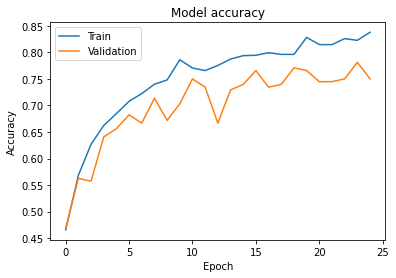

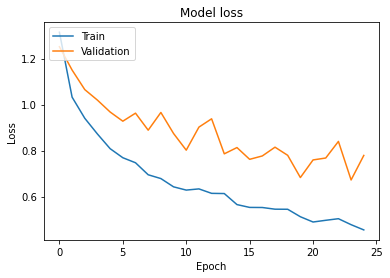

In [33]:
import matplotlib.pyplot as plt

# Plot the training accuracy
plt.plot(history.history['accuracy'])
# Plot the validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
# Plot the validation loss
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
#Save the model
model2.save('CNN_Nail_model_Dropout.h5')


In [35]:
# Load the model
loaded_model2 = tf.keras.models.load_model('/content/CNN_Nail_model_Dropout.h5')


In [36]:
# Predict image
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Dataset/Test/normal nail/n1 (1).jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model2.predict(test_image)

# Get class labels from the generator
class_labels = list(training_set.class_indices.keys())

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(result[0])

# Get the label of the predicted class
predicted_class_label = class_labels[predicted_class_index]

# Get the index of the class with the
print(predicted_class_label)



1/1 [==============================] - 0s 45ms/step
black line


### Model3

In [37]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(units = 256, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units = 4, activation = 'softmax'))
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
# Compile the model
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model to the training data
history = model3.fit_generator(training_set,
                    steps_per_epoch = training_set.samples // training_set.batch_size,
                    epochs = 25,
                    validation_data = test_set,
                    validation_steps = test_set.samples // test_set.batch_size,
                    verbose=1)

Epoch 1/25


<ipython-input-38-3167c9c696b6>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model3.fit_generator(training_set,


39/39 [==============================] - 8s 175ms/step - loss: 1.3110 - accuracy: 0.3756 - val_loss: 1.2286 - val_accuracy: 0.4740
Epoch 2/25
39/39 [==============================] - 7s 169ms/step - loss: 1.1262 - accuracy: 0.5474 - val_loss: 1.1443 - val_accuracy: 0.5104
Epoch 3/25
39/39 [==============================] - 7s 174ms/step - loss: 1.0134 - accuracy: 0.5795 - val_loss: 1.1213 - val_accuracy: 0.5000
Epoch 4/25
39/39 [==============================] - 7s 184ms/step - loss: 0.9259 - accuracy: 0.6172 - val_loss: 1.0481 - val_accuracy: 0.5469
Epoch 5/25
39/39 [==============================] - 7s 169ms/step - loss: 0.9159 - accuracy: 0.6324 - val_loss: 1.0012 - val_accuracy: 0.6198
Epoch 6/25
39/39 [==============================] - 7s 187ms/step - loss: 0.8750 - accuracy: 0.6421 - val_loss: 0.9896 - val_accuracy: 0.6302
Epoch 7/25
39/39 [==============================] - 7s 169ms/step - loss: 0.8050 - accuracy: 0.6950 - val_loss: 0.9168 - val_accuracy: 0.6406
Epoch 8/25
39/39 

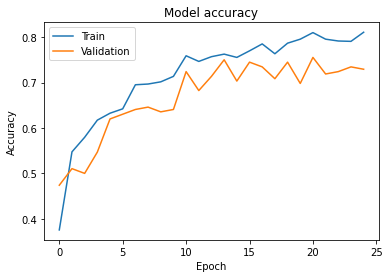

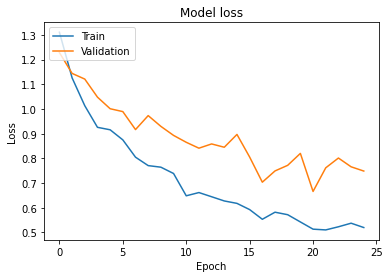

In [39]:
import matplotlib.pyplot as plt

# Plot the training accuracy
plt.plot(history.history['accuracy'])
# Plot the validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
# Plot the validation loss
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
#Save the model
model3.save('CNN_Nail_model3_VGG.h5')


In [41]:
# Load the model
loaded_model3 = tf.keras.models.load_model('/content/CNN_Nail_model3_VGG.h5')


In [43]:
# Predict image
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Dataset/Test/normal nail/n1 (1).jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model3.predict(test_image)

# Get class labels from the generator
class_labels = list(training_set.class_indices.keys())

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(result[0])

# Get the label of the predicted class
predicted_class_label = class_labels[predicted_class_index]

# Get the index of the class with the
print(predicted_class_label)



1/1 [==============================] - 0s 135ms/step
white spot


### Model4

In [46]:
from keras.layers import Input, BatchNormalization, Activation, Conv2D, Add,GlobalAveragePooling2D
from keras.models import Model

In [47]:
from keras.layers import Add

inputs = Input(shape=(64, 64, 3))

x = Conv2D(32, 3, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

residual = x

x = Conv2D(32, 3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(32, 3, strides=1, padding='same')(x)
x = BatchNormalization()(x)

x = Add()([x, residual])
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
output = Dense(units = 4, activation = 'softmax')(x)

model4 = Model(inputs, output)
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [48]:
# Compile the model
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model to the training data
history = model4.fit_generator(training_set,
                    steps_per_epoch = training_set.samples // training_set.batch_size,
                    epochs = 25,
                    validation_data = test_set,
                    validation_steps = test_set.samples // test_set.batch_size,
                    verbose=1)

Epoch 1/25


<ipython-input-48-79a3c9882ed2>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model4.fit_generator(training_set,


39/39 [==============================] - 7s 174ms/step - loss: 1.1729 - accuracy: 0.4880 - val_loss: 1.3863 - val_accuracy: 0.2969
Epoch 2/25
39/39 [==============================] - 8s 196ms/step - loss: 1.0281 - accuracy: 0.5698 - val_loss: 1.4188 - val_accuracy: 0.3229
Epoch 3/25
39/39 [==============================] - 7s 167ms/step - loss: 1.0214 - accuracy: 0.5730 - val_loss: 1.4704 - val_accuracy: 0.3073
Epoch 4/25
39/39 [==============================] - 7s 169ms/step - loss: 0.9676 - accuracy: 0.5835 - val_loss: 1.3754 - val_accuracy: 0.3698
Epoch 5/25
39/39 [==============================] - 8s 194ms/step - loss: 0.9329 - accuracy: 0.6164 - val_loss: 1.4709 - val_accuracy: 0.3802
Epoch 6/25
39/39 [==============================] - 10s 244ms/step - loss: 0.9266 - accuracy: 0.6244 - val_loss: 1.3386 - val_accuracy: 0.3906
Epoch 7/25
39/39 [==============================] - 7s 171ms/step - loss: 0.9139 - accuracy: 0.6164 - val_loss: 1.4008 - val_accuracy: 0.4323
Epoch 8/25
39/39

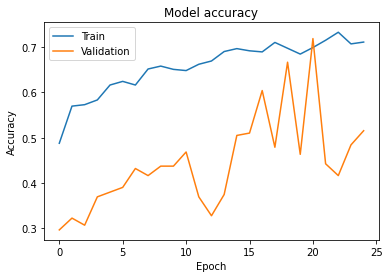

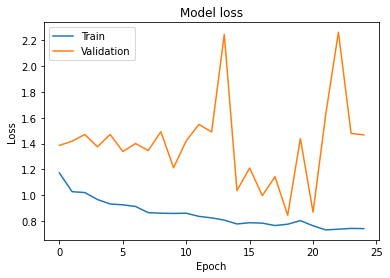

In [49]:
import matplotlib.pyplot as plt

# Plot the training accuracy
plt.plot(history.history['accuracy'])
# Plot the validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
# Plot the validation loss
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [50]:
#Save the model
model4.save('CNN_Nail_model4_ResNet.h5')


In [51]:
# Load the model
loaded_model4 = tf.keras.models.load_model('/content/CNN_Nail_model4_ResNet.h5')


In [52]:
# Predict image
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Dataset/Test/normal nail/n1 (1).jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model4.predict(test_image)

# Get class labels from the generator
class_labels = list(training_set.class_indices.keys())

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(result[0])

# Get the label of the predicted class
predicted_class_label = class_labels[predicted_class_index]

# Get the index of the class with the
print(predicted_class_label)



1/1 [==============================] - 0s 105ms/step
black line
